# **Analysis of the influence of aquaculture pond construction on mangrove forests in Asian countries.**

## Introduction
Almost one third of the world's mangrove forests have been lost due to deforestation in the last 50 years (Alongi, 2002; Barbier, 2014). Along with coastal development, another major cause of global mangrove deforestation is the development of shrimp farms to support a booming export fishing industry (Barbier and Cox, 2004; Hamilton, 2020; Richards and Friess, 2016), with global demand for shrimp continuing to rise (Anderson et al., 2019). A study by Hamilton (2013) found that 51.9% of the original mangrove areas have been deforested between the 1970s and after 2004, with commercial aquaculture accounting for 28% of the total mangrove loss in eight countries: Indonesia, Brazil, Bangladesh, India, Thailand, Vietnam, Ecuador and China.

This notebook series studies the influence of aquaculture pond construction on mangrove forests through spatial analysis of two datasets: Aquaculture dynamics (Ottinger et al., 2021) and the Global Mangrove Watch version 3 (Bunting et al., 2018; Bunting, Rosenqvist, Hilarides, Lucas, & Thomas, 2022; Bunting, Rosenqvist, Hilarides, Lucas, Thomas, et al., 2022).

The general objective is to look for a relationship between the activation or construction of aquaculture ponds and the loss of mangrove forest extent. For this purpose, several notebooks were made for the different steps in the analysis process:

1. DataPreparation: The datasets are divided by countries in Asia and the layers are organised in separate folders.
2. Mangrove_GMW_Analysis: Only the Global Mangrove Watch dataset is analysed and an analysis of the dynamics within Asia is made.
3. Acuiculture_mangrove_relation_analysis: We proceed to analyse the relationship between both datasets using geoprocessing tools and working with dataframes.

    3a.   Acuiculture_mangrove_relation_graphics: The results of the analysis are visualised for interpretation and understanding.

    3b.   3b_Acuiculture_mangrove_relation_maps: Mapping cumulative mangrove loss due to pond construction from 1996 to 2019.

# Notebook 4: Graphical output of the final layer of mangrove-related ponds.

This code is intended to illustrate the relationship between aquaculture ponds and mangrove forests through statistical and graphical analysis. In this notebook we are going to use all the layers generated so far with the previous analyses. These layers are the layers of ponds per country with all the columns resulting from the analyses, plus a summary table of mangrove area losses per country for all the years analysed.



## 4.1. Creation of the dictionary summarising the variables by country.

First we define the libraries we are going to use.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np


We then defined the countries to be analysed as the 10 countries with the greatest loss of mangrove forest extent in Asia.

In [3]:
# Define the countries and their corresponding file paths
countries = {
    'Myanmar': 'Countries/Myanmar/Myan_ponds_mangroves.gpkg',
    'Philippines': 'Countries/Philipine/Phil_ponds_mangroves.gpkg',
    'Bangladesh': 'Countries/Bangladesh/Bang_ponds_mangroves.gpkg',
    'Indonesia' : 'Countries/Indonesia/Indo_ponds_mangroves.gpkg',
    'India' : 'Countries/India/India_ponds_mangroves.gpkg',
    'Malaysia' : 'Countries/Malaysia/Mala_ponds_mangroves.gpkg',
    'Pakistan' : 'Countries/Pakistan/Pak_ponds_mangroves.gpkg',
    'Thailand' : 'Countries/Thailand/Thai_ponds_mangroves.gpkg',
    'Vietnam' : 'Countries/Vietnam/Viet_ponds_mangroves.gpkg',
    'China' : 'Countries/China/China_ponds_mangroves.gpkg'
}


In the next segment we are going to prepare the dictionary that will be used for the analysis and the graphs. First we define again the years on which we are going to focus the analysis. Then we create an empty dictionary where we are going to store all the variables by country and by year that we want to analyse. The filling of this dictionary will be done by means of a loop that will run for each of the countries. The objective is to create the following columns or variables for each country and for all years:

   -'Year': This is our column that we will use as an index to group the data for each country.
        
   -Active Ponds': This column summarises the number (count) of total active aquaculture ponds for that particular year.
        
   -Mangroves in Active Ponds': This column summarises the number of ponds that are active that year but have mangroves in them.
        
   -Total Mangroves': This column represents the number of ponds with mangroves either active or inactive.     
        
   -Area Difference Summary': This is the most important variable because it summarises the sum of the areas (in square kilometers) of mangrove loss that have a direct relationship to the construction of ponds.
        
   -Dis_Act Counts': This column has the count of the number of ponds where mangrove forest was lost due to pond construction and activation.


At the end of the code, lines are added to print the results as each country is processed.

In [4]:
# Define the years and mangrove columns
years = ["1996", "2007", "2008", "2009", "2010", "2015", "2016", "2017", "2018", "2019"]
mangrove_columns = ["m" + year for year in years]

# Create a dictionary to hold the data for each country
country_data = {}

for country, path in countries.items():
    # Read the shapefile
    gdf = gpd.read_file(path)

    # Fill NaN values in the mangrove columns
    for column in mangrove_columns:
        gdf[column] = gdf[column].fillna(0)

    # Prepare data for DataFrame
    active_ponds = [gdf[year].value_counts().get(1, 0) for year in years]
    mangroves_in_active_ponds = [gdf[gdf[year] == 1]['m' + year].value_counts().get(1, 0) for year in years]
    total_mangroves = [gdf['m' + year].value_counts().get(1, 0) for year in years]
    area_difference_summary = [gdf.loc[(gdf['dis_act'] == year) & (gdf['area_difference'] > 0)]['area_difference'].sum()/1000000 for year in years]
    dis_act_counts = gdf['dis_act'].value_counts().reindex(years, fill_value=0).values

    # Create a DataFrame with the data
    data = pd.DataFrame({
        'Year': years,
        'Active Ponds': active_ponds,
        'Mangroves in Active Ponds': mangroves_in_active_ponds,
        'Total Mangroves': total_mangroves,
        'Area Difference Summary': area_difference_summary,
        'Dis_Act Counts': dis_act_counts
    })

    # Set 'Year' as the index
    data.set_index('Year', inplace=True)

    # Save the data to the dictionary
    country_data[country] = data

    # Print the data
    print(f"Data for {country}:")
    print(data)
    print("\n" + "-" * 50 + "\n")



Data for Myanmar:
      Active Ponds  Mangroves in Active Ponds  Total Mangroves  \
Year                                                             
1996         39366                       7953            15395   
2007         51129                       8093            11962   
2008         57317                       7692            11199   
2009         55447                       7688            11353   
2010         53073                       7497            10857   
2015         65552                       8590            10032   
2016         68151                       8513             9874   
2017         70242                       8592             9802   
2018         73748                       8742             9582   
2019         78185                       8813             9505   

      Area Difference Summary  Dis_Act Counts  
Year                                           
1996                 0.000000               0  
2007                28.925564            1489

Now we import the result from notebook # 3 on the analysis of mangrove forest dynamics in Asia. This is a csv file that has for each country the total area of mangrove forest loss.

In [5]:
loss_df = pd.read_csv('Mangrove/loss_data_asia.csv')

loss_df

,Unnamed: 0,Country,2007,2008,2009,2010,2015,2016,2017,2018,2019
0,0,Indonesia,1558.348957,638.589372,369.504146,397.069838,683.968271,449.963571,329.507022,315.992044,323.500691
1,1,India,274.285345,86.432245,73.552735,75.129749,97.870454,79.268682,67.453948,68.021279,90.457814
2,2,Sri Lanka,39.492944,34.499772,20.023841,13.512628,11.282391,8.923497,10.215179,9.653870,26.062379
3,3,Philippines,158.491818,87.682440,51.063013,55.189382,69.128787,56.653230,44.050273,42.961246,50.668280
4,4,Thailand,116.267339,72.916006,36.370785,31.277696,43.153295,34.643204,25.188098,45.118166,27.926828
5,5,Malaysia,82.709444,46.576945,25.018952,30.889215,68.644655,48.228470,29.258433,29.210971,37.769120
6,6,Brunei,0.822672,0.652457,0.301064,0.489934,0.957013,0.691638,0.409474,0.145198,0.359473
7,7,Myanmar,502.282821,145.227755,58.535737,125.994902,287.125280,126.763723,99.786827,165.242237,118.355105
8,8,Vietnam,115.379050,59.271478,40.289796,42.762302,79.651071,59.496962,43.355532,39.399986,45.810990
9,9,Singapore,0.727817,0.386860,0.116918,0.153034,0.460938,0.274235,0.201390,0.231386,0.227101


Then we join the values of this dataframe to the dictionary with the data by country. The result is the same dictionary as above but with the column "loss" that represent the total area (in square kilometers) mangrove losses for each year. With this resulting dictionary we will carry out the statistical analysis and graphs for a better interpretation.

In [6]:
# Convert the 'Year' columns in loss_df to integer for matching
loss_df.columns = [str(col) if col != 'Country' and col != 'Unnamed: 0' else col for col in loss_df.columns]

# Create a dictionary from loss_df for easier lookup
loss_dict = loss_df.set_index('Country').drop(columns='Unnamed: 0').T.to_dict()

# Add 'Loss' column to country_data
for country in country_data.keys():
    if country in loss_dict:
        for year in country_data[country].index:
            if str(year) in loss_dict[country]:
                country_data[country].loc[year, 'Loss'] = loss_dict[country][str(year)]


Finally we remove the 0's from our dictionary and replace them with NaN. In this way these values are taken into account in our future analyses. For example in the first year 1996 the variables related to change have a value of 0 which could influence our correlation analysis.

In [7]:
# Loop through each DataFrame in the country_data dictionary
for country, df in country_data.items():
    # Replace all 0 values with NaN
    country_data[country] = df.replace(0, np.nan)

This is how the dictionary has finally turned out

In [8]:
country_data

{'Myanmar':       Active Ponds  Mangroves in Active Ponds  Total Mangroves  \
 Year                                                             
 1996         39366                       7953            15395   
 2007         51129                       8093            11962   
 2008         57317                       7692            11199   
 2009         55447                       7688            11353   
 2010         53073                       7497            10857   
 2015         65552                       8590            10032   
 2016         68151                       8513             9874   
 2017         70242                       8592             9802   
 2018         73748                       8742             9582   
 2019         78185                       8813             9505   
 
       Area Difference Summary  Dis_Act Counts        Loss  
 Year                                                       
 1996                      NaN             NaN         NaN  


## 4.2. Statistical correlation analysis

In this section the correlation between the variables is analysed for each country. This is primarily to validate part of the analysis that was carried out on the mangrove areas directly affected by the construction of ponds. In addition, this analysis aims to find out in which countries the development, construction and activation of aquaculture ponds have most directly affected mangrove forests.

First we create a correlation matrix between the different columns for each country. In this way we explore how the relationship between the variables behaves.

In [9]:
# Initialize an empty dictionary to store the correlation matrices for each country
correlation_matrices = {}

# Loop through each country's DataFrame in the dictionary to calculate its correlation matrix
for country, df in country_data.items():
    # Drop rows where any value is NaN for accurate correlation calculation
    df_clean = df.dropna()

    # Calculate the correlation matrix
    corr_matrix = df_clean.corr()

    # Save the correlation matrix to the dictionary
    correlation_matrices[country] = corr_matrix

# To view a correlation matrix for a specific country (e.g., 'Myanmar')
print(correlation_matrices['Myanmar'])

                           Active Ponds  Mangroves in Active Ponds  \
Active Ponds                   1.000000                   0.890194   
Mangroves in Active Ponds      0.890194                   1.000000   
Total Mangroves               -0.941981                  -0.806796   
Area Difference Summary       -0.462809                  -0.034931   
Dis_Act Counts                -0.516917                  -0.106956   
Loss                          -0.365123                   0.055588   

                           Total Mangroves  Area Difference Summary  \
Active Ponds                     -0.941981                -0.462809   
Mangroves in Active Ponds        -0.806796                -0.034931   
Total Mangroves                   1.000000                 0.563948   
Area Difference Summary           0.563948                 1.000000   
Dis_Act Counts                    0.621795                 0.991457   
Loss                              0.451228                 0.973947   

           

As a result we obtain a correlation matrix for a given country which can be chosen by changing the country name in the code. In this case we show the results for the example case study Myanmar. In this case it is observed that the variables most related to the total loss of mangrove cover per year are "Area Difference Summary" and "Dis_Act Counts" which are the two variables that represent the loss of mangroves caused by the activation of the ponds. To find out what this relationship looks like in all countries and to plot it we turn to the following code.

Below we visualise the correlation in each country between the total annual mangrove losses and the total mangrove losses directly caused by the activation and/or construction of aquaculture ponds.

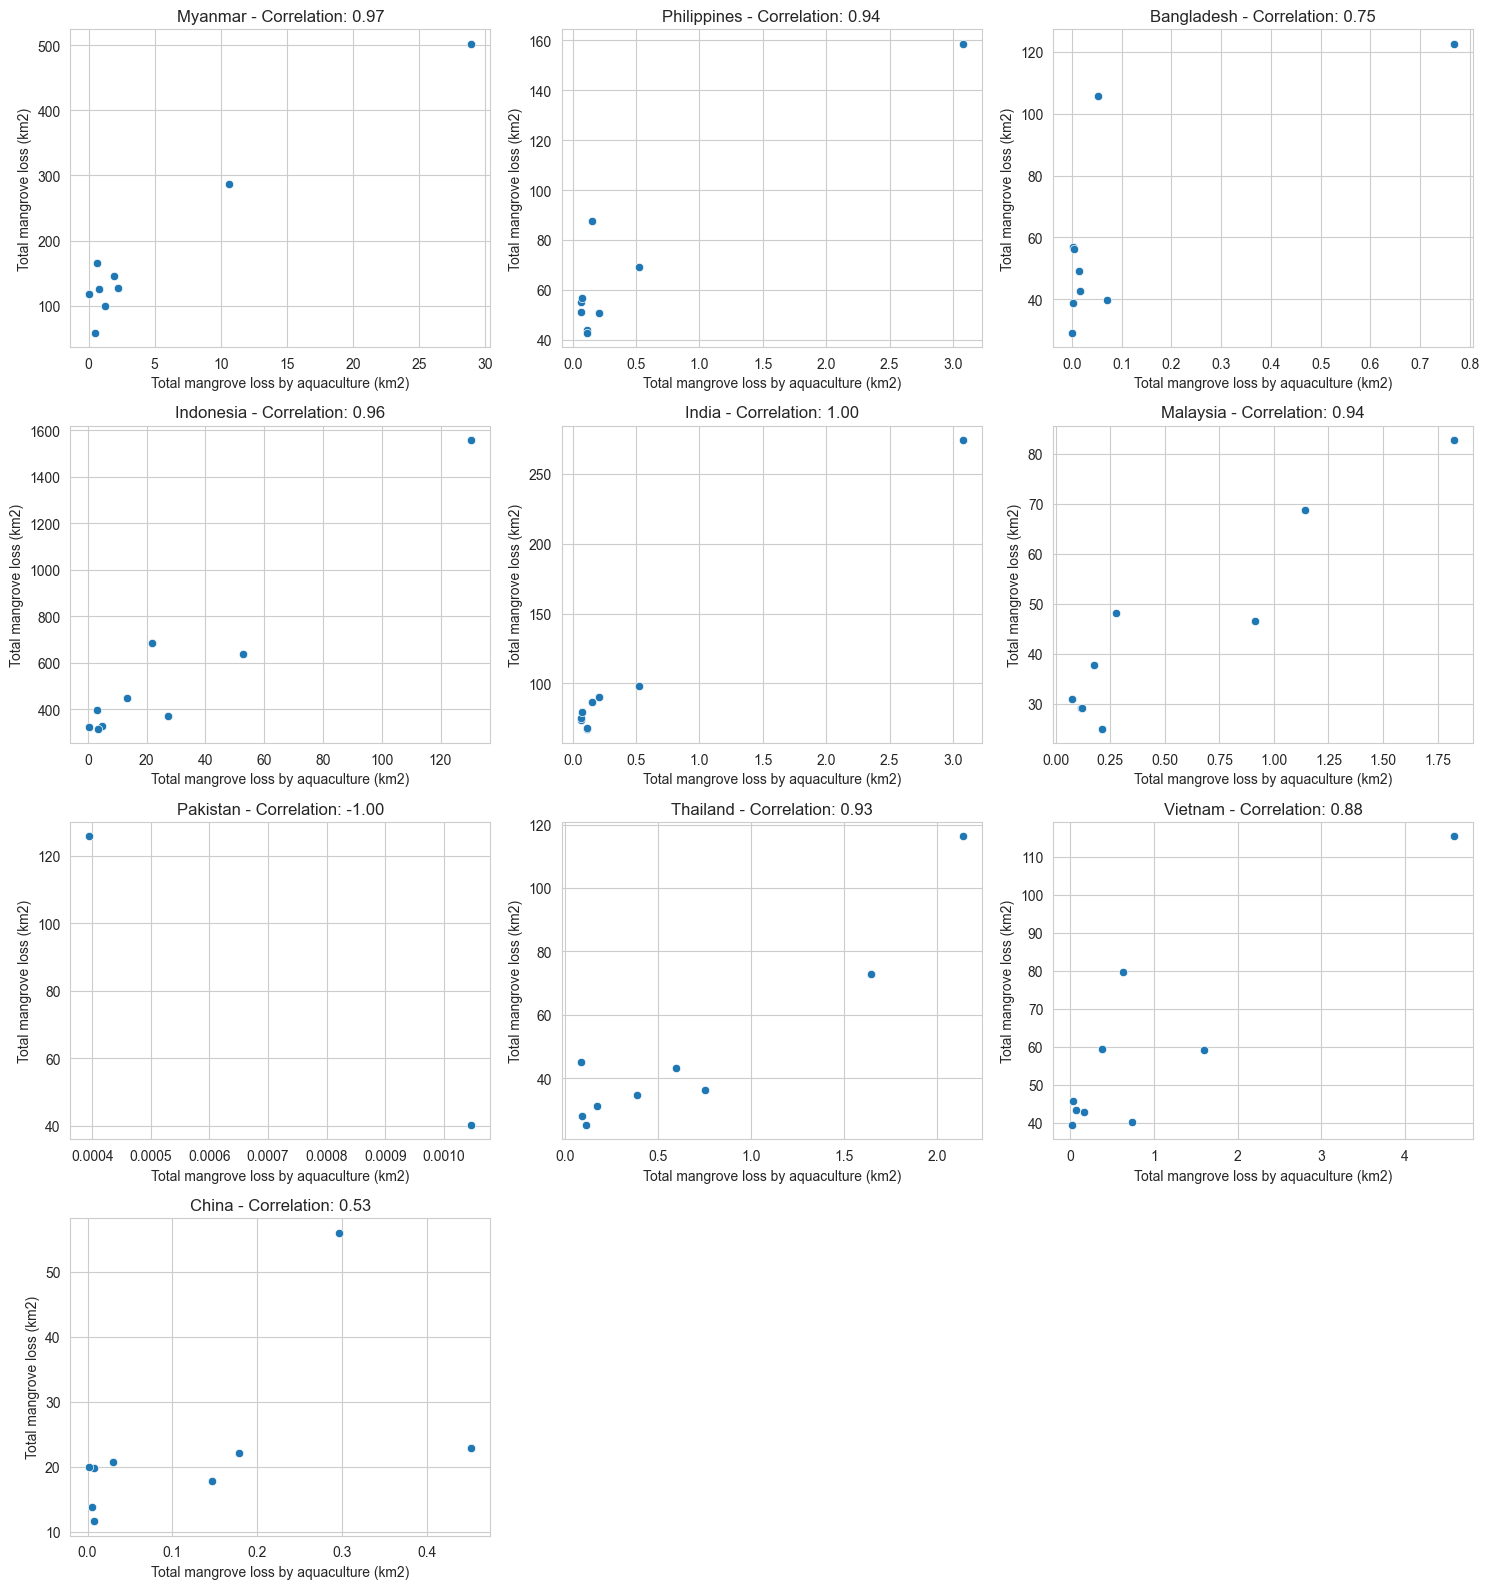

In [19]:
# Number of countries
num_countries = len(country_data)

# Calculate number of rows needed for subplots
num_rows = math.ceil(num_countries / 3)

# Initialize subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Loop through each country's DataFrame in the dictionary and its corresponding subplot
for ax, (country, df) in zip(axes_flat, country_data.items()):
    # Drop rows where either 'Area Difference Summary' or 'Loss' is NaN
    df_clean = df.dropna(subset=['Area Difference Summary', 'Loss'])

    # Calculate the correlation
    corr_value = df_clean['Area Difference Summary'].corr(df_clean['Loss'])

    # Create scatter plot in the subplot
    sns.scatterplot(data=df_clean, x='Area Difference Summary', y='Loss', ax=ax)
    ax.set_title(f"{country} - Correlation: {corr_value:.2f}")
    ax.set_xlabel('Total mangrove loss by aquaculture (km2)')
    ax.set_ylabel('Total mangrove loss (km2)')

# Remove any unused subplots
for i in range(num_countries, num_rows * 3):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.savefig("1 Correlation between the losses by aquaculture and total losses.png", dpi=300, format='png', bbox_inches='tight')
plt.show()



The results show that in almost all the countries analysed there is a relationship between total mangrove losses and the losses generated by the development of open-air pond aquaculture. In order of highest to lowest correlation we have India, Myanmar, Indonesia, Malaysia, Philippines and Thailand. China, despite its intensive development in this sector and being the largest producer of aquaculture products in the world, has a low correlation with mangrove forest losses.

The case of Pakistan is a very rare one, as the values of mangrove loss due to aquaculture decrease to the point of disappearance from the year 2007 until a very small portion again in the last year of analysis. It will be necessary to study this case further to see the causes of this behaviour.

## 4.2. Creation of summary graphs by countries

In this section we create several graphs to illustrate the behaviour of some of the variables for each country over the years. First, we will create line graphs representing the dynamics of the two variables analysed above and their correlation in order to get a clearer picture of their behaviour.

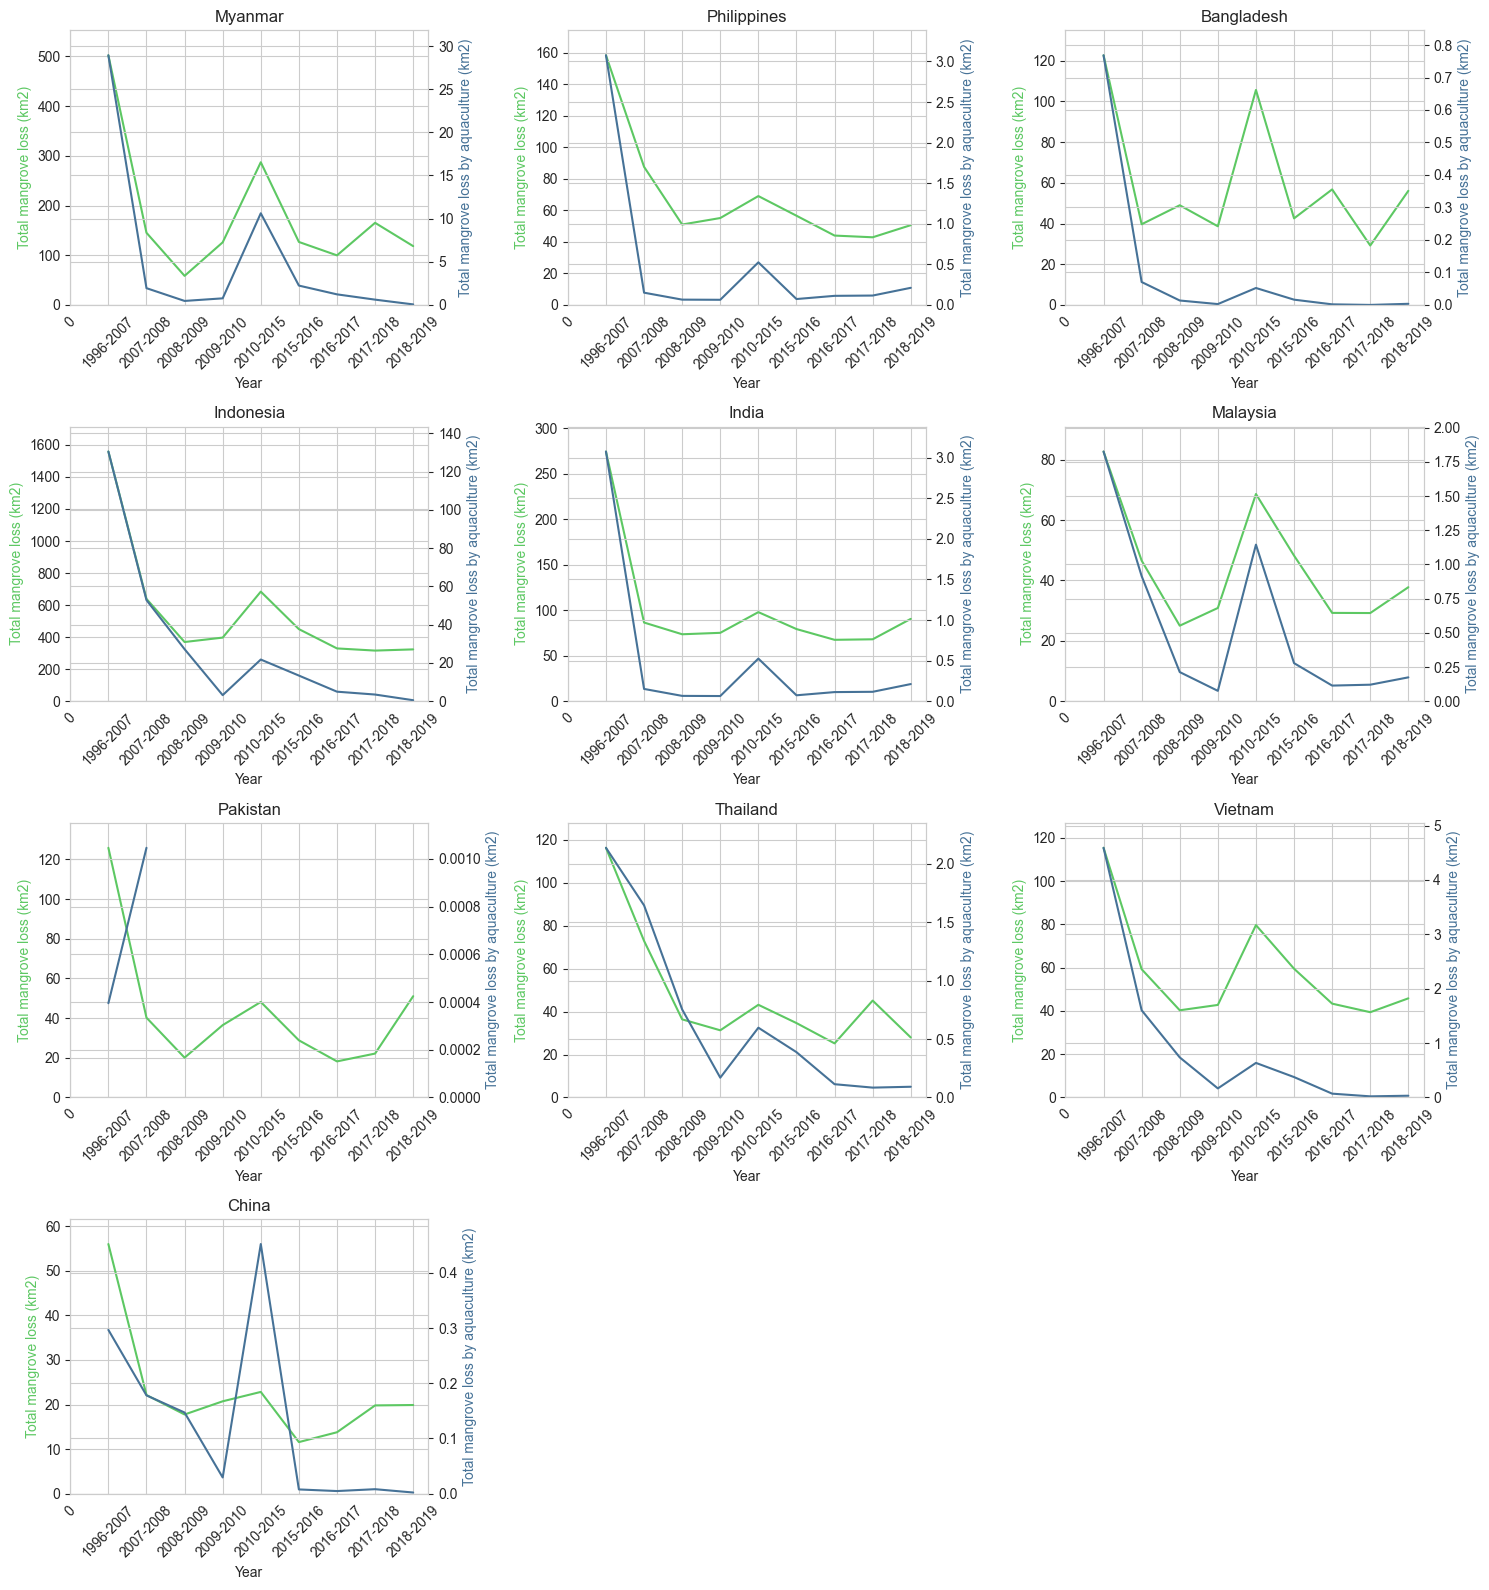

In [11]:
# Determine the number of subplots (rows and columns)
n_countries = len(country_data) # Number of countries
n_cols = 3
n_rows = (n_countries + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.flatten()

# Loop through countries and plot
for i, (country, df) in enumerate(country_data.items()):
    ax1 = axs[i]
    ax2 = ax1.twinx()  # Create another axis on the right for the second variable

    # Use df.index if 'Year' is the index of the DataFrame
    ax1.plot(df.index, df['Loss'], color='#5dc863')
    ax2.plot(df.index, df['Area Difference Summary'], '#467297')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total mangrove loss (km2)', color='#5dc863')
    ax2.set_ylabel('Total mangrove loss by aquaculture (km2)', color='#467297')

    # Set the max and min plus 10%.
    max_value_for_ax1 = df['Loss'].max()
    max_value_for_ax2 = df['Area Difference Summary'].max()
    ax1.set_ylim(0, max_value_for_ax1 * 1.1)
    ax2.set_ylim(0, max_value_for_ax2 * 1.1)

    ax1.set_xticks(df.index)  # Set the tick locations
    ax1.set_xticklabels(["0","1996-2007", "2007-2008", "2008-2009", "2009-2010", "2010-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019"], rotation=45)

    ax1.set_title(country)

# Remove any unused subplots
for i in range(n_countries, n_rows * n_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig("2 Total losses vs losses by aquaculture line graph.png", dpi=300, format='png', bbox_inches='tight')
plt.show()


In these graphs we can see the similarity in the behaviour of the two previous variables in a more graphic way and analyse which have been the periods of time where aquaculture has had more impact on mangroves in each country. We observe that in almost all countries the information gap between the years 1996-2007 and 2010-2015 has an influence. In between these gaps, significant losses occurred, of which we only observed the cumulative or end-of-period effects. Because of this, we have to limit our interpretations in terms of dynamics. But in terms of total accumulated over the whole period of analysis the interpretations are still valid as the following section demonstrates.

It is then interesting to see which countries have the most mangrove area directly affected by the construction of ponds. For this we created a bar chart with the cumulative total of mangrove area affected during the whole analysis period 1996 - 2019.

C:\Users\almei\AppData\Local\Temp\ipykernel_3824\1275764157.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Area Difference Summary', y='Country', data=sum_area_diff_df, palette='viridis')


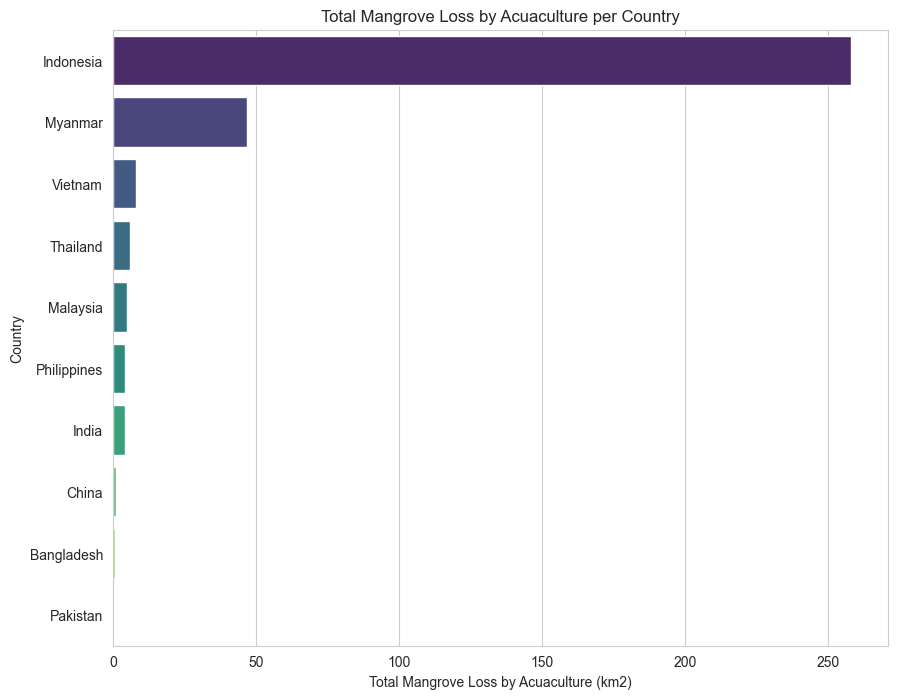

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize an empty list to hold the sum of 'Area Difference Summary' for each country
sum_area_diff = []

# Loop through each DataFrame in the country_data dictionary
for country, df in country_data.items():
    # Calculate the sum of 'Area Difference Summary' for the country
    sum_value = df['Area Difference Summary'].sum()
    sum_area_diff.append({'Country': country, 'Total Area Difference Summary': sum_value})

# Create a DataFrame from the list
sum_area_diff_df = pd.DataFrame(sum_area_diff)

# Sort the DataFrame by 'Total Area Difference Summary'
sum_area_diff_df = sum_area_diff_df.sort_values(by='Total Area Difference Summary', ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Area Difference Summary', y='Country', data=sum_area_diff_df, palette='viridis')
plt.xlabel('Total Mangrove Loss by Acuaculture (km2)')
plt.ylabel('Country')
plt.title('Total Mangrove Loss by Acuaculture per Country')
plt.savefig("3 Total Mangrove Loss by Acuaculture.png", dpi=300, format='png', bbox_inches='tight')
plt.show()


Here it is clear that the countries that have lost the most mangrove forests due to the construction of ponds are Indonesia, Myanmar and Vietnam. Coincidentally, together with the following are countries with emerging economies in recent years that are in transition from a primary to a secondary sector economy.

Let's find out what is the percentage that this loss due to aquaculture represents in relation to the total loss of mangroves. To do this we will create a new column in our dictionary with this information.

In [13]:
# Loop through each DataFrame in the country_data dictionary
for country, df in country_data.items():
    # Calculate the percentage that 'Area Difference Summary' is of 'Loss'
    df['Area Difference Summary %'] = (df['Area Difference Summary'] / df['Loss']) * 100


We will now create bar charts to illustrate this trend by year for each country.

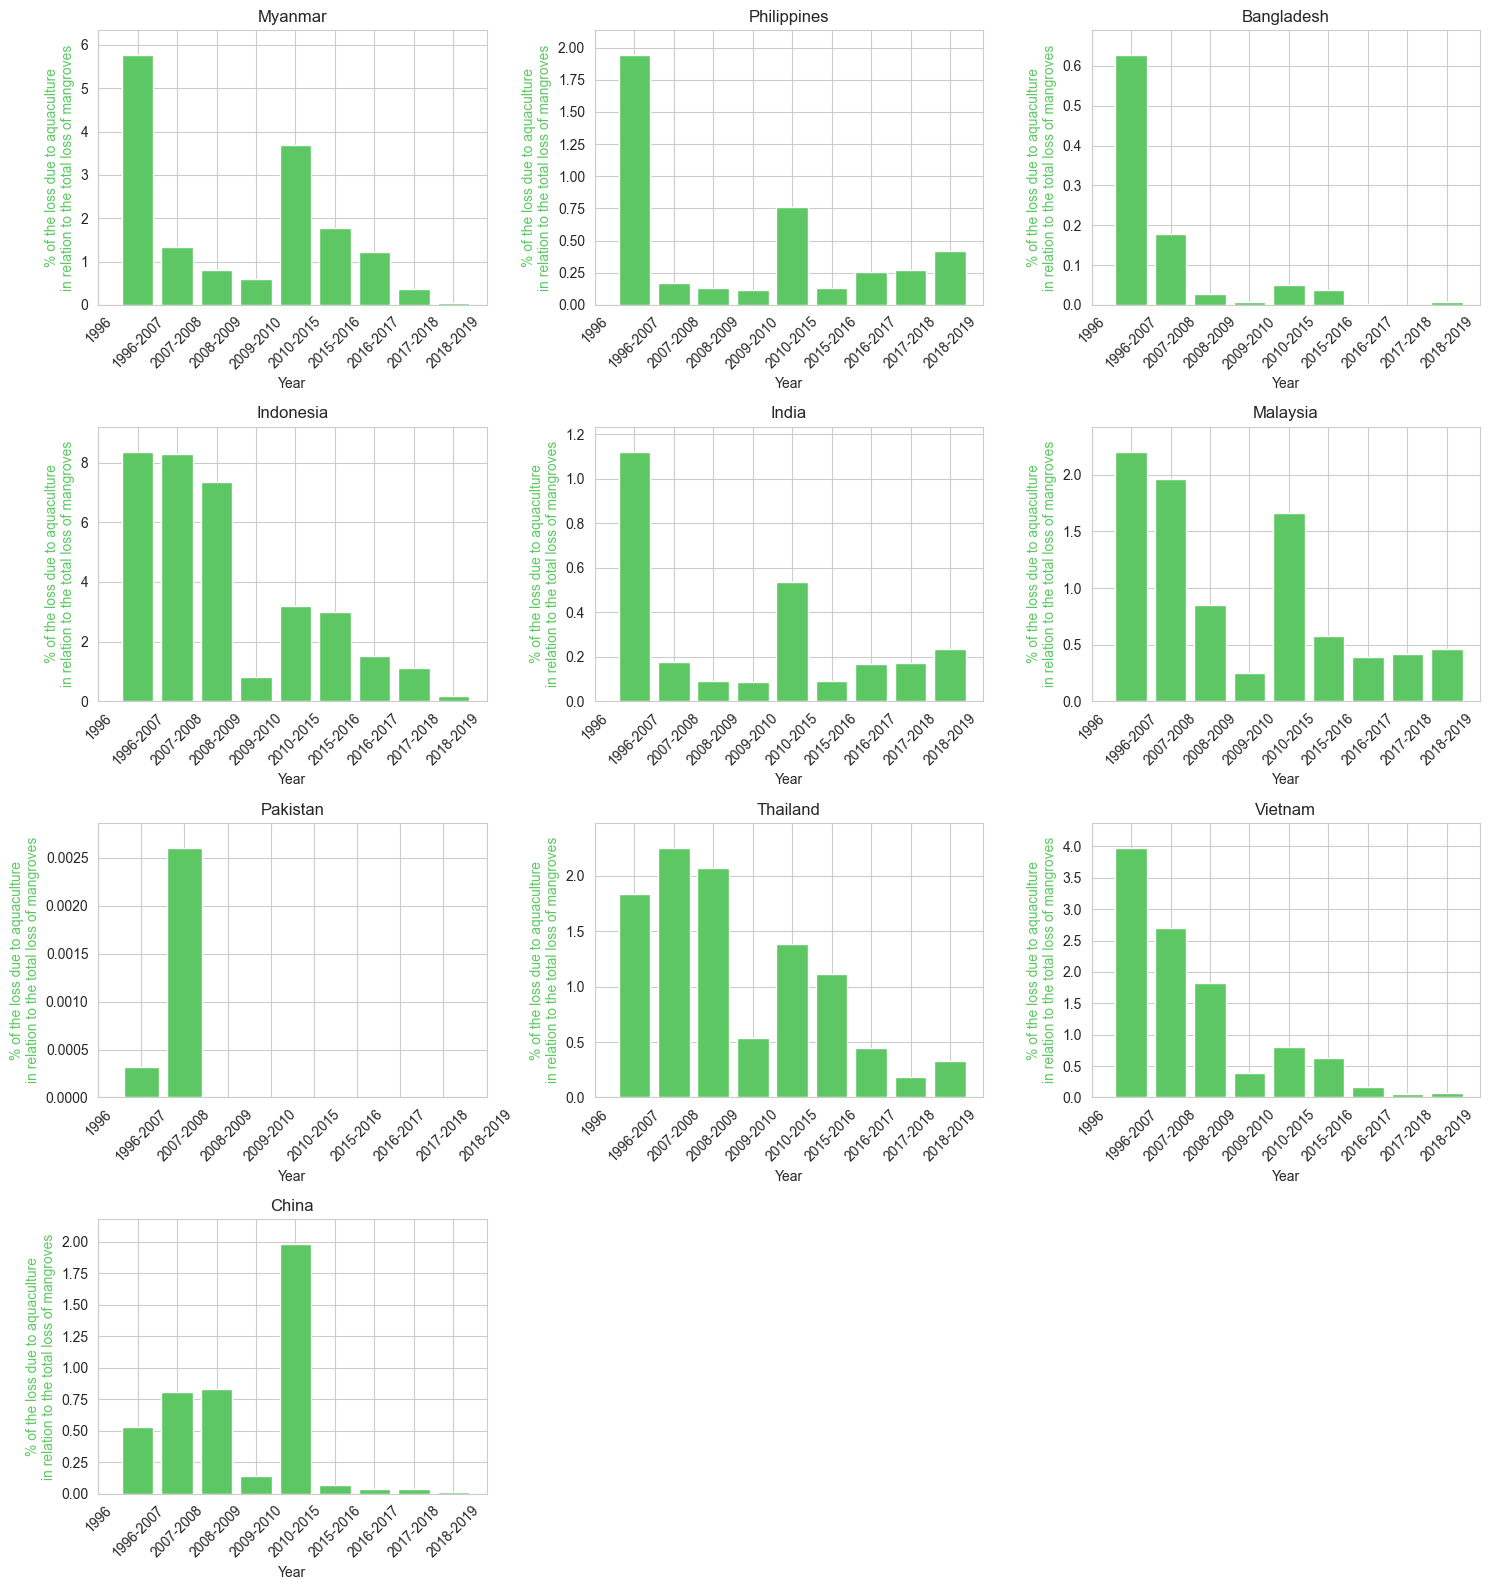

In [17]:
# Determine the number of subplots (rows and columns)
n_countries = len(country_data) # Number of countries
n_cols = 3
n_rows = (n_countries + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.flatten()

# Loop through countries and plot
for i, (country, df) in enumerate(country_data.items()):
    ax1 = axs[i]

    # Use df.index if 'Year' is the index of the DataFrame
    ax1.bar(df.index, df['Area Difference Summary %'], color='#5dc863')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('% of the loss due to aquaculture\nin relation to the total loss of mangroves', color='#5dc863')


    # Set the max and min plus 10%.
    max_value_for_ax1 = df['Area Difference Summary %'].max()
    ax1.set_ylim(0, max_value_for_ax1 * 1.1)


    ax1.set_xticks(df.index)  # Set the tick locations
    ax1.set_xticklabels(["1996","1996-2007", "2007-2008", "2008-2009", "2009-2010", "2010-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019"], rotation=45)

    ax1.set_title(country)

# Remove any unused subplots
for i in range(n_countries, n_rows * n_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig("4 Percent of loss by aquaculture vs total losses.png", dpi=300, format='png', bbox_inches='tight')
plt.show()


Although the percentages are very low in relation to total losses, we see that Indonesia, Vietnam and Myanmar are still the countries most affected by aquaculture.

We will then create a graph that allows us to see the behaviour of the activation (start-up or maintenance) of the ponds together with the evolution of the presence of mangrove in these active ponds. This will allow us to identify on a yearly basis how many ponds were active and yet were more than half covered by mangrove. In addition, we will match the scale at which both variables are displayed to illustrate the proportion that these ponds represent with respect to the total.

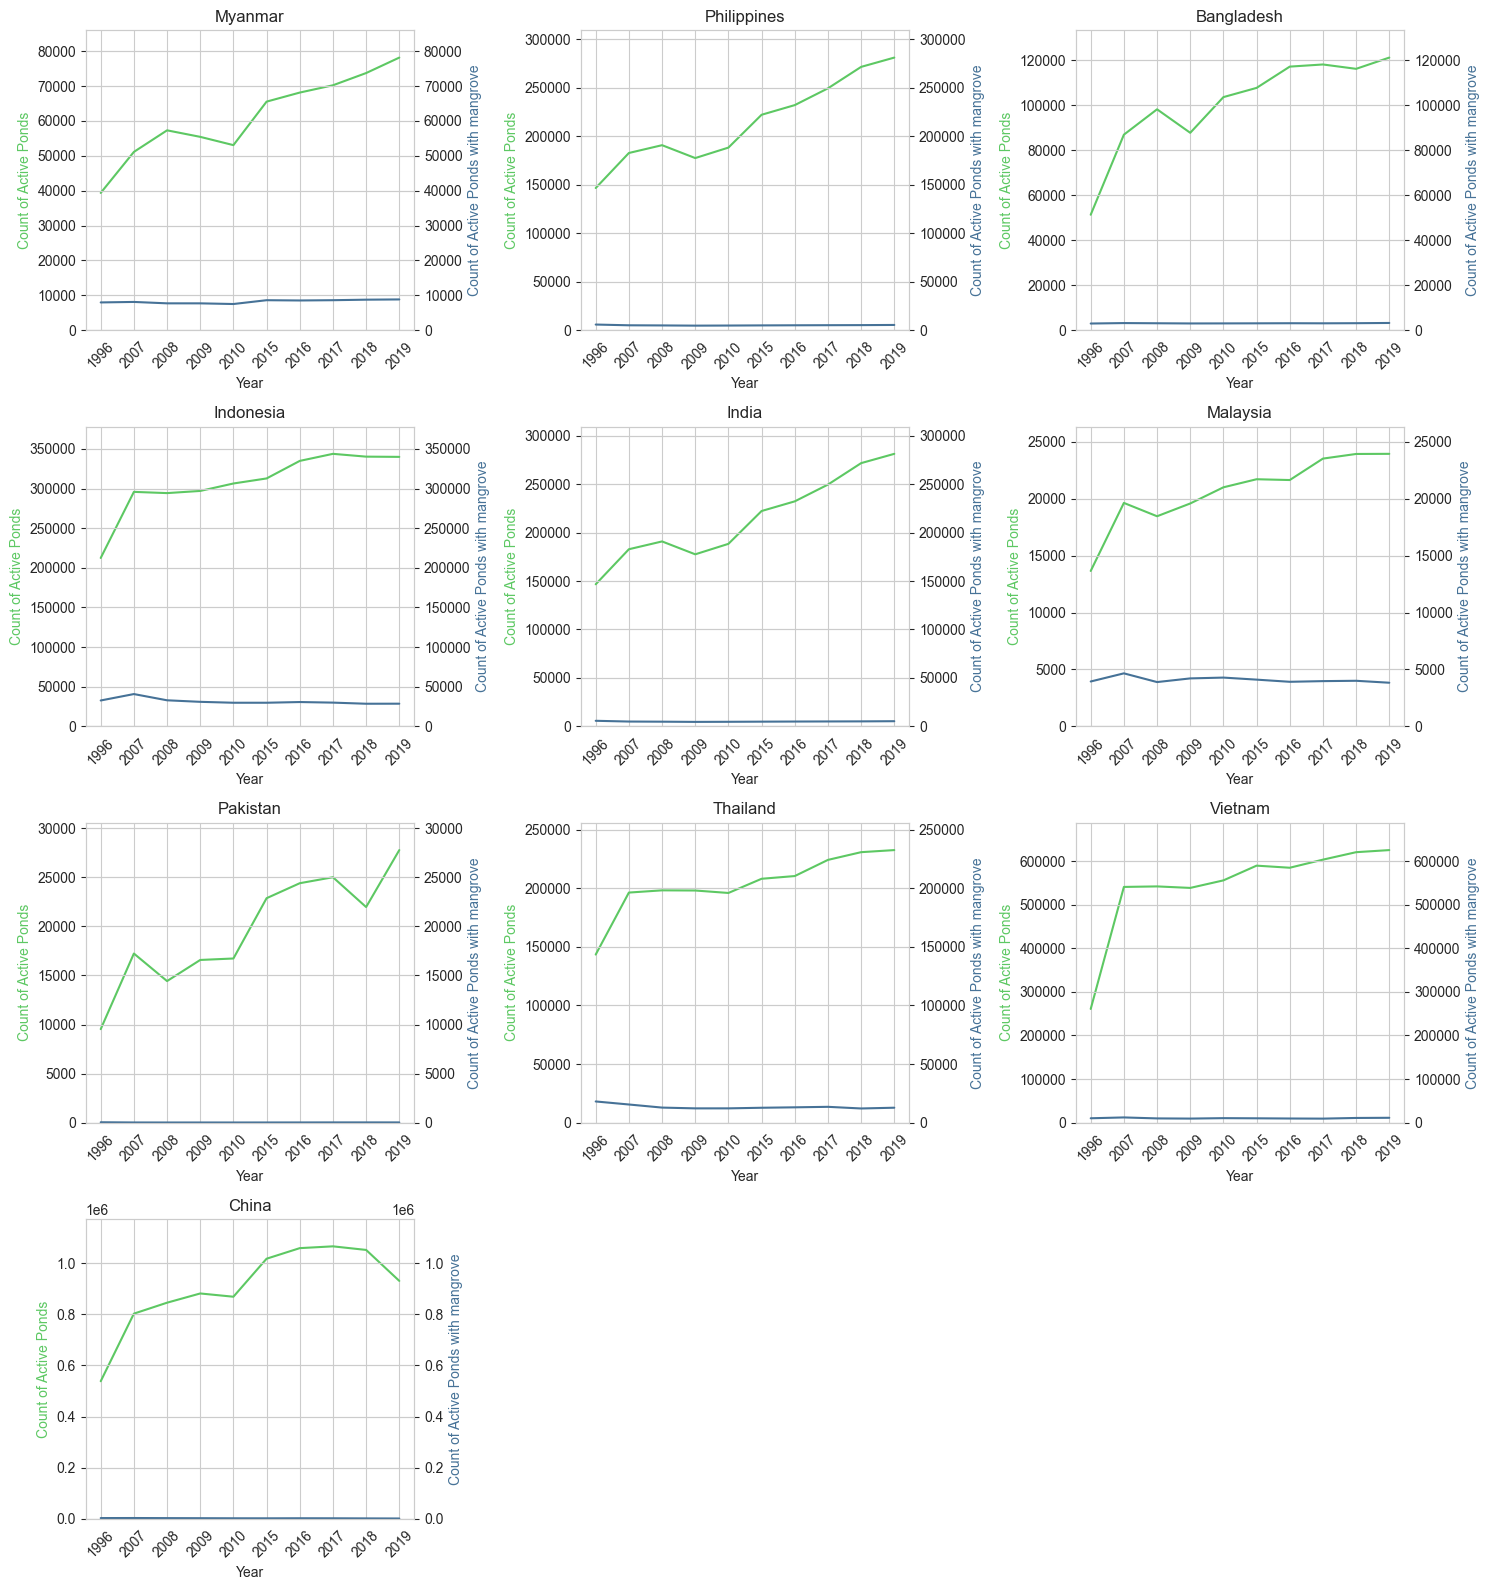

In [18]:
# Determine the number of subplots (rows and columns)
n_countries = len(country_data) # Number of countries
n_cols = 3
n_rows = (n_countries + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.flatten()


# Loop through countries and plot
for i, (country, df) in enumerate(country_data.items()):
    ax1 = axs[i]
    ax2 = ax1.twinx()  # Create another axis on the right for the second variable

    # Use df.index if 'Year' is the index of the DataFrame
    ax1.plot(df.index, df['Active Ponds'], color='#5dc863')
    ax2.plot(df.index, df['Mangroves in Active Ponds'], '#467297')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Count of Active Ponds', color='#5dc863')
    ax2.set_ylabel('Count of Active Ponds with mangrove', color='#467297')

    # Set the max and min plus 10%.
    max_value_for_ax1 = df['Active Ponds'].max()
    max_value_for_ax2 = df['Mangroves in Active Ponds'].max()
    ax1.set_ylim(0, max_value_for_ax1 * 1.1)
    ax2.set_ylim(0, max_value_for_ax1 * 1.1)

    ax1.set_xticks(df.index)  # Set the tick locations
    ax1.set_xticklabels(df.index, rotation=45)

    ax1.set_title(country)

# Remove any unused subplots
for i in range(n_countries, n_rows * n_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig("5 Active Ponds vs Active ponds with mangrove.png", dpi=300, format='png', bbox_inches='tight')
plt.show()

This result is rather useful to evaluate the errors of the dataset based on the fact that if a pond is active, it should not contain more than half of its area covered by mangroves. Thus we see that in some countries the number of ponds with this situation is higher, such as Malaysia, Myanmar and Indonesia. In almost all other countries there are very low numbers of ponds with this error.